## Problem Statement:
BoomBikes has suffered dip in therire revinues due to the Pandamic. So decided to come up with mindful businees plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

## Factors:
Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Importing, Reading and Understanding Data

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [231]:
# Read data from CSV file
dfDay = pd.read_csv('day.csv')
dfDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [232]:
# checking shapre of the data
dfDay.shape

(730, 16)

In [233]:
# Checking null value
dfDay.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Data cleaning & Splitting

In [234]:
# Copying the dataframe into new
dfDay_copy = dfDay.copy()

# checking the shape of new dataframe
dfDay_copy.shape

(730, 16)

In [235]:
# dropping the duplicates
dfDay_copy.drop_duplicates(inplace=True)

# re-verifying the shape of new dataframe
dfDay_copy.shape

(730, 16)

In [236]:
# Renaming columns for better readability
dfDay.rename(columns={'yr':'year','mnth':'month', 'cnt':'count'}, inplace=True)

In [237]:
# as mentioned in the readme file of the dataset mapping season values to their respective names
dfDay.season = dfDay.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
dfDay.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [238]:
# mapping month numbers to month names
dfDay.month = dfDay.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
dfDay.month.head()

0    jan
1    jan
2    jan
3    jan
4    jan
Name: month, dtype: object

In [239]:
#We are assuming the day sunday as 0 and saturday as 6
dfDay.weekday = dfDay.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
dfDay.weekday.head()


0    sat
1    sun
2    mon
3    tue
4    wed
Name: weekday, dtype: object

In [240]:
# checking the info of dataframe
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   year        730 non-null    int64  
 4   month       730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


In [241]:
# mapping weather situation values to their respective names
dfDay.weathersit = dfDay.weathersit.map({1:'clear',2:'mist',3:'lightSnow',4:'heavyRain'})
dfDay.weathersit.head()
dfDay.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [242]:
# instant has only index for the row
# dteday has date which can be compensated by year and month column
# 'cnt' variable indicates the total number of bike rentals, including both casual and registered.

dfDay = dfDay.drop(['instant', 'dteday','casual','registered'], axis=1)
dfDay.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization and Understanding

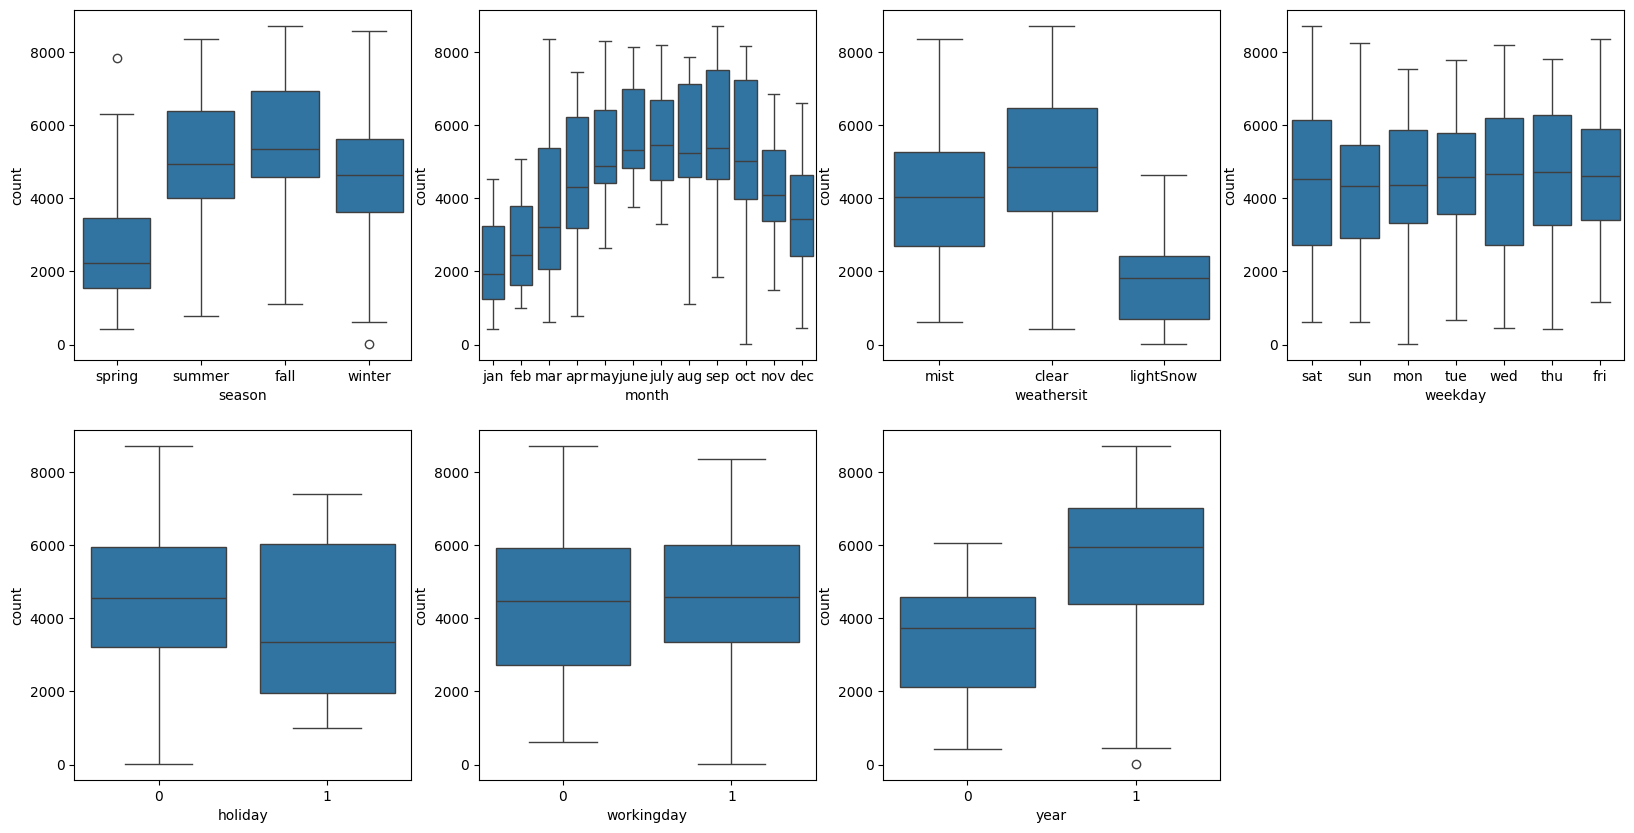

In [243]:
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = dfDay)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = dfDay)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'count', data = dfDay)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'count', data = dfDay)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = dfDay)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = dfDay)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = dfDay)
plt.show()

Analysis
1.	During summer and winter we see bike hiring increased comparted to spring
2.	May to Oct we could see the increase in hiring compared to other months
3.	During clear weather hiring is increased compared to others
4.	During holiday high hiring compared to non-holiday days
5.	2019 attacked more number of booking compared to previous year 2018
6.  We could see 2 outliers in season under spring and winter

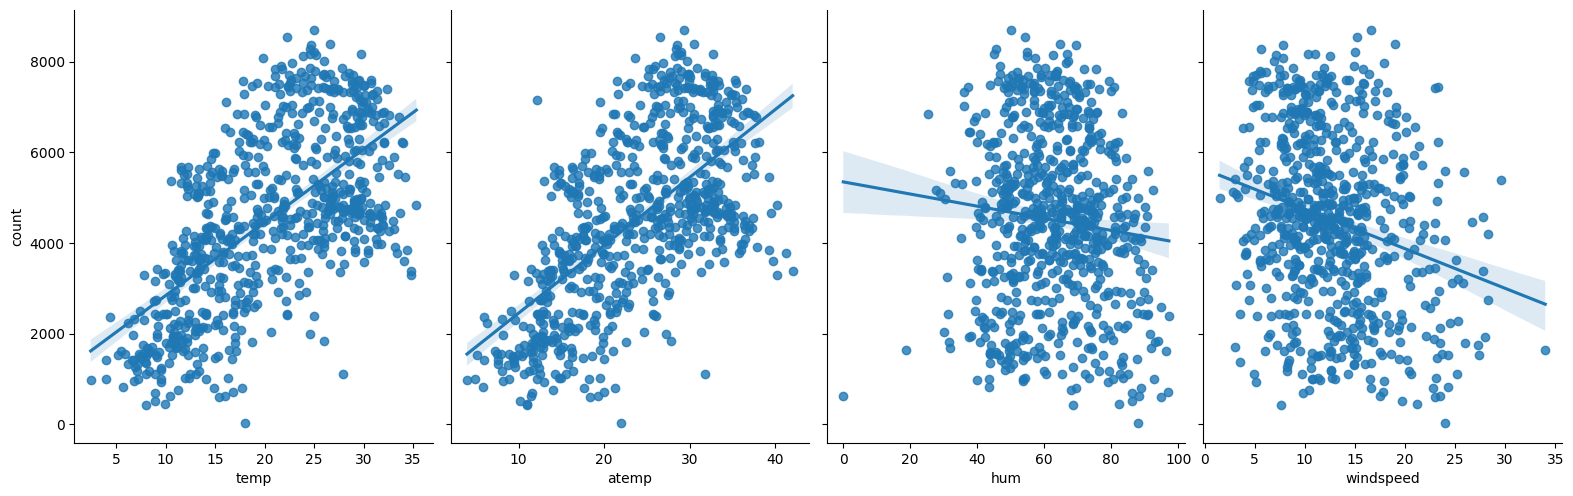

In [244]:
# Pairplot for continuous variables vs count variable to see the relationships between them
sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['count'], data=dfDay, height=5, aspect=0.8, kind='reg')
plt.show()

Analysis:
1. Correlation between temp and atemp is very high. So we can drop any one of them.
2. Humidity has a negative correlation with count of bike rentals.
3. Windspeed has very less correlation with count of bike rentals.

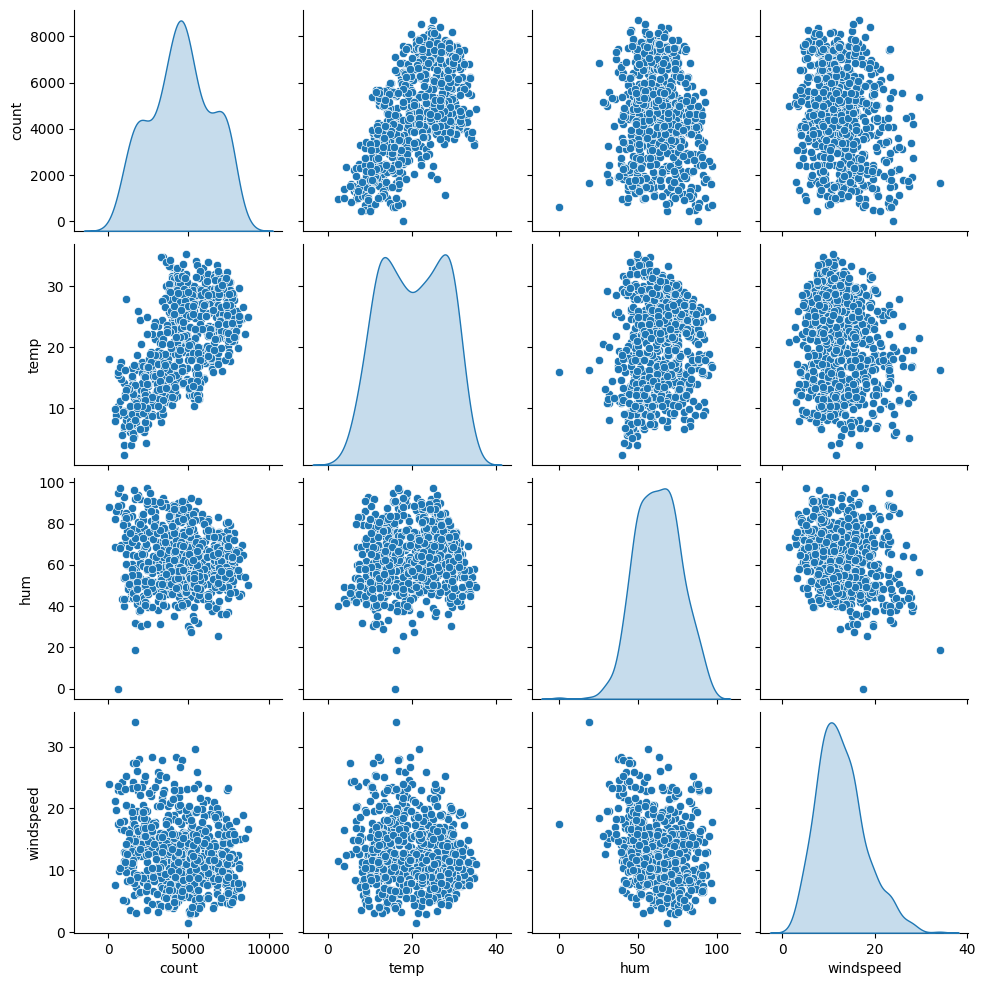

In [245]:
# Numeric columns for relationship checks
num_cols = ["count", "temp", "hum", "windspeed"]
sns.pairplot(dfDay[num_cols], diag_kind="kde")
plt.show()

In [246]:
# correlation between temp and atemp is very high. So we can drop any one of them.
dfDay.drop(['atemp'], axis=1, inplace=True)

In [247]:
dfDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [248]:
# Marking these columns as categorical so get_dummies works correctly
dfDay['season'] = dfDay['season'].astype('category')
dfDay['weathersit'] = dfDay['weathersit'].astype('category')
dfDay['month'] = dfDay['month'].astype('category')
dfDay['weekday'] = dfDay['weekday'].astype('category')
dfDay.dtypes

season        category
year             int64
month         category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
hum            float64
windspeed      float64
count            int64
dtype: object

In [249]:
#season_indicators = pd.get_dummies(dfDay['season'],drop_first=True) i need to return 0 or 1 not true or false
season_dummies = pd.get_dummies(dfDay['season'], drop_first=True, dtype=int)
month_dummies = pd.get_dummies(dfDay['month'], drop_first=True, dtype=int)
weekday_dummies = pd.get_dummies(dfDay['weekday'], drop_first=True, dtype=int)
weathersit_dummies = pd.get_dummies(dfDay['weathersit'], drop_first=True, dtype=int)

In [250]:
dfDay = pd.concat([dfDay, season_dummies, month_dummies, weekday_dummies, weathersit_dummies], axis=1)
# as we created dummies out of these columns its no longer needed
dfDay = dfDay.drop(columns=['season', 'month', 'weekday', 'weathersit'])
dfDay.head()

,year,holiday,workingday,temp,hum,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model Building

In [251]:
# Splitting the data into train and test sets for model building
df_train, df_test = train_test_split(dfDay, train_size = 0.7, random_state = 100)
df_train.shape, df_test.shape

((510, 29), (220, 29))

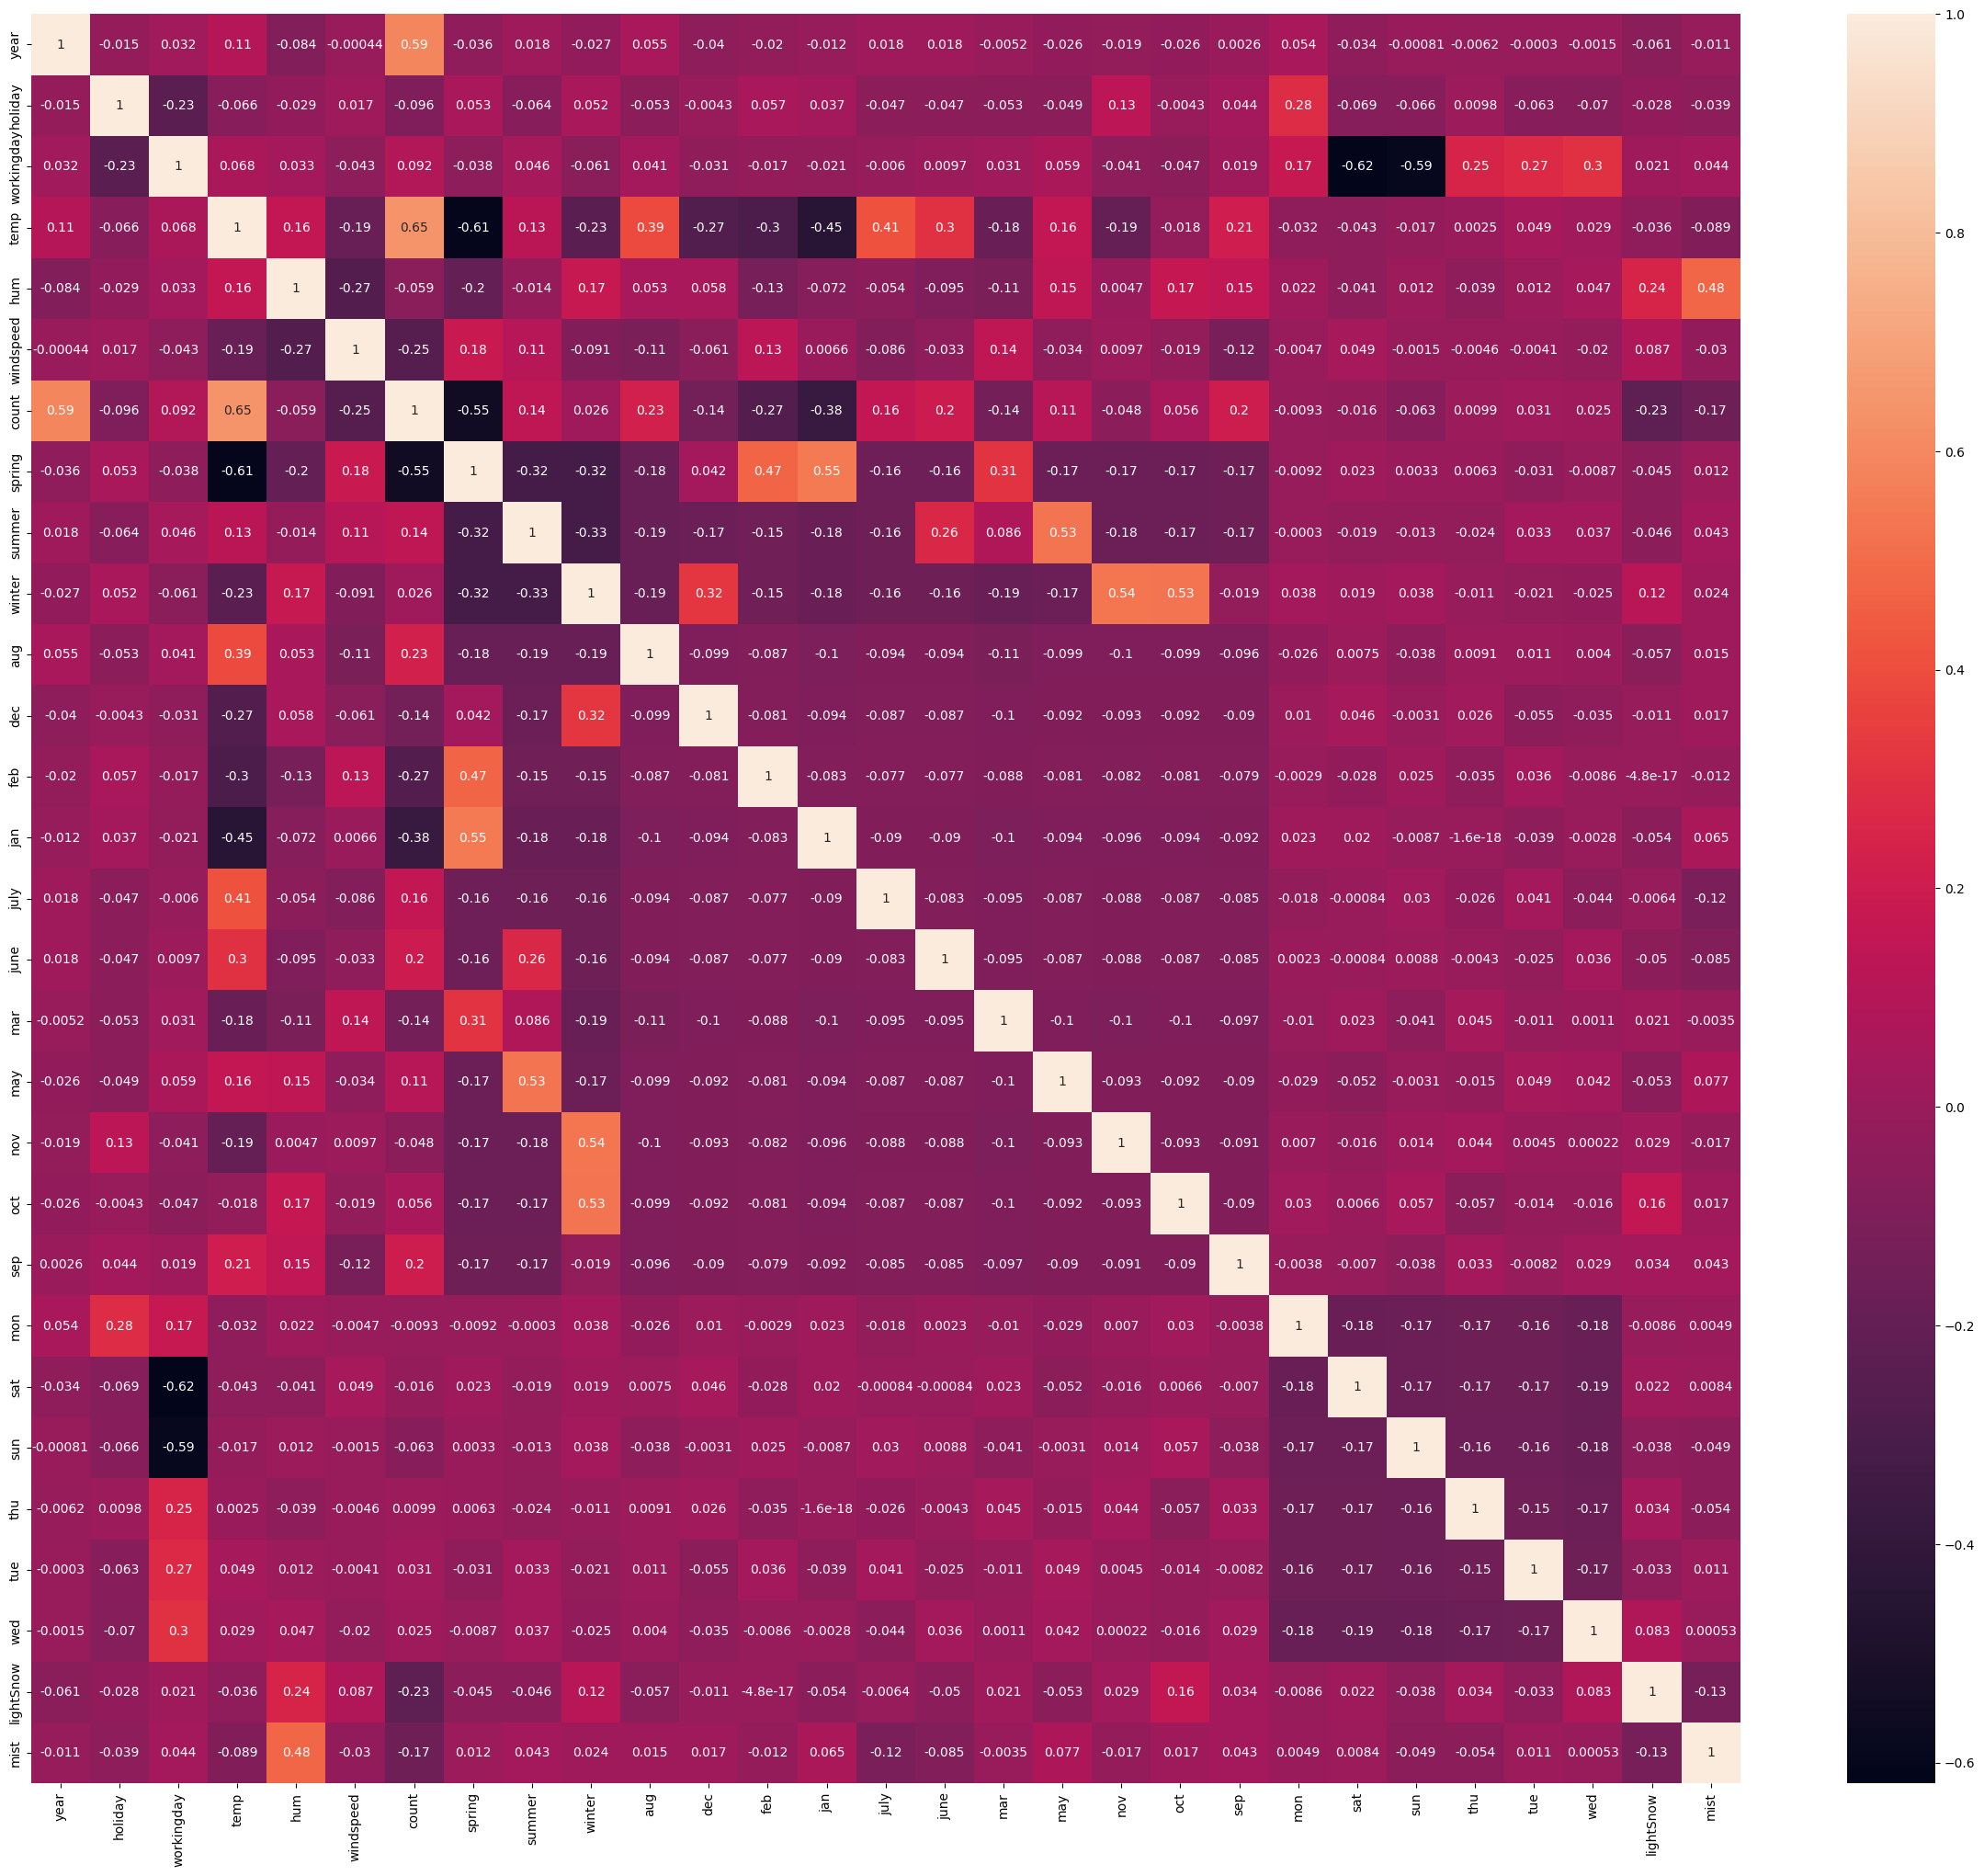

In [252]:
#Checking what are the variables are highly correlated
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Based on the heat map analysis below are the the features that are best to build
['year', 'holiday', 'workingday', 'temp', 'hum', 'spring', 'summer', 'winter', 'jan', 'july', 'sep', 'lightSnow', 'mist']

## Scaling and transform

In [253]:
scaler = MinMaxScaler()
numeric_vars = ['temp','hum','windspeed','count']
scaler.fit(df_train[numeric_vars])
df_train[numeric_vars] = scaler.transform(df_train[numeric_vars])

In [254]:
y_train = df_train.pop('count')
x_train = df_train

In [255]:
# add these variable list picked from heat map and above visulization analysis for further model building as explained in the session without going with RFE.
# There are 13 variables we will keep droping based on VIF and P values until we get the better prediction variables.
col_list = ['year', 'holiday', 'workingday', 'temp', 'hum', 'spring', 'summer', 'winter', 'jan', 'july', 'sep', 'lightSnow', 'mist']


In [256]:
# Function defined to reuse ols fitting for various iterations
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    return model

In [257]:
# function to reuse when reiterate vif checking
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def compute_vif(df):
    vif_df = pd.DataFrame()
    vif_df["Features"] = df.columns
    vif_df["VIF"] = [
        variance_inflation_factor(df.values, i)
        for i in range(df.shape[1])
    ]
    vif_df["VIF"] = vif_df["VIF"].round(2)
    return vif_df.sort_values(by="VIF", ascending=False)

In [258]:
# Model
lr_model = ols_fit(y_train, x_train[col_list])
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.3
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          7.57e-180
Time:                        18:23:12   Log-Likelihood:                 487.35
No. Observations:                 510   AIC:                            -946.7
Df Residuals:                     496   BIC:                            -887.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1842      0.034      5.394      0.000       0.117       0.251
year           0.2302      0.009     27.056      0.000       0.213       0.247
holiday       -0.0879      0.027     -3.205      0.001      -0.142      -0.034
workingday     0.0179      0.009      1.940      0.053      -0.000       0.036
temp           0.5137      0.037     14.067      0.000       0.442       0.585
hum           -0.0905      0.038     -2.385      0.017      -0.165      -0.016
spring        -0.0689      0.022     -3.156      0.002      -0.112      -0.026
summer         0.0373      0.016      2.381      0.018       0.007       0.068
winter         0.0894      0.018      4.873      0.000       0.053       0.125
jan           -0.0199      0.018     -1.088      0.277      -0.056       0.016
july          -0.0528      0.019     -2.749      0.006      -0.090      -0.015
sep            0.0848      0.017      4.844      0.000       0.050       0.119
lightSnow     -0.2783      0.027    -10.285      0.000      -0.331      -0.225
mist          -0.0640      0.011     -5.891      0.000      -0.085      -0.043
==============================================================================
Omnibus:                       61.568   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.256
Skew:                          -0.597   Prob(JB):                     1.30e-36
Kurtosis:                       5.520   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
vif = compute_vif(x_train[col_list])
vif

,Features,VIF
4,hum,28.97
3,temp,15.65
5,spring,3.44
2,workingday,3.20
7,winter,3.05
6,summer,2.44
12,mist,2.28
0,year,2.09
8,jan,1.66
9,july,1.59


In [260]:
#remove hum from col_list based on high vif values
col_list.remove('hum')
# Model 1
lr_model = ols_fit(y_train, x_train[col_list])
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          8.84e-180
Time:                        18:23:14   Log-Likelihood:                 484.44
No. Observations:                 510   AIC:                            -942.9
Df Residuals:                     497   BIC:                            -887.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1469      0.031      4.816      0.000       0.087       0.207
year           0.2326      0.008     27.402      0.000       0.216       0.249
holiday       -0.0878      0.028     -3.184      0.002      -0.142      -0.034
workingday     0.0180      0.009      1.940      0.053      -0.000       0.036
temp           0.4898      0.035     13.882      0.000       0.420       0.559
spring        -0.0728      0.022     -3.332      0.001      -0.116      -0.030
summer         0.0346      0.016      2.207      0.028       0.004       0.065
winter         0.0803      0.018      4.453      0.000       0.045       0.116
jan           -0.0242      0.018     -1.321      0.187      -0.060       0.012
july          -0.0498      0.019     -2.588      0.010      -0.088      -0.012
sep            0.0808      0.018      4.619      0.000       0.046       0.115
lightSnow     -0.3015      0.025    -11.886      0.000      -0.351      -0.252
mist          -0.0785      0.009     -8.689      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       62.588   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.145
Skew:                          -0.609   Prob(JB):                     5.07e-37
Kurtosis:                       5.526   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
#remove jan from col_list based on vif values
col_list.remove('jan')
# Model 2
lr_model = ols_fit(y_train, x_train[col_list])
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.6
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.41e-180
Time:                        18:23:14   Log-Likelihood:                 483.55
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     498   BIC:                            -892.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1384      0.030      4.637      0.000       0.080       0.197
year           0.2322      0.008     27.351      0.000       0.216       0.249
holiday       -0.0882      0.028     -3.197      0.001      -0.142      -0.034
workingday     0.0179      0.009      1.931      0.054      -0.000       0.036
temp           0.5014      0.034     14.662      0.000       0.434       0.569
spring        -0.0760      0.022     -3.496      0.001      -0.119      -0.033
summer         0.0369      0.016      2.363      0.019       0.006       0.068
winter         0.0841      0.018      4.722      0.000       0.049       0.119
july          -0.0509      0.019     -2.645      0.008      -0.089      -0.013
sep            0.0810      0.018      4.625      0.000       0.047       0.115
lightSnow     -0.3003      0.025    -11.837      0.000      -0.350      -0.250
mist          -0.0791      0.009     -8.762      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       61.408   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.577
Skew:                          -0.596   Prob(JB):                     1.83e-36
Kurtosis:                       5.515   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
vif = compute_vif(x_train[col_list])
vif

,Features,VIF
3,temp,5.17
2,workingday,3.16
0,year,2.07
5,summer,1.99
6,winter,1.64
4,spring,1.58
7,july,1.58
10,mist,1.56
8,sep,1.34
1,holiday,1.09


In [263]:
#remove workingday from col_list based on vif values
col_list.remove('workingday')
# Model 3
#Let us rebuild the final model of manual approach using statsmodel to interpret it
lr_model = ols_fit(y_train, x_train[col_list])
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          5.71e-181
Time:                        18:23:15   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.029      5.124      0.000       0.093       0.208
year           0.2326      0.009     27.333      0.000       0.216       0.249
holiday       -0.1003      0.027     -3.721      0.000      -0.153      -0.047
temp           0.5029      0.034     14.670      0.000       0.436       0.570
spring        -0.0766      0.022     -3.514      0.000      -0.119      -0.034
summer         0.0367      0.016      2.342      0.020       0.006       0.067
winter         0.0829      0.018      4.642      0.000       0.048       0.118
july          -0.0523      0.019     -2.715      0.007      -0.090      -0.014
sep            0.0812      0.018      4.623      0.000       0.047       0.116
lightSnow     -0.2989      0.025    -11.756      0.000      -0.349      -0.249
mist          -0.0785      0.009     -8.669      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       66.927   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.674
Skew:                          -0.678   Prob(JB):                     1.74e-36
Kurtosis:                       5.431   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
# VIF for all variables are now < 5 
vif = compute_vif(x_train[col_list])
vif

,Features,VIF
2,temp,4.22
0,year,2.06
4,summer,1.94
6,july,1.58
5,winter,1.57
9,mist,1.55
3,spring,1.40
7,sep,1.34
8,lightSnow,1.07
1,holiday,1.04


In [265]:
# Final model predictions on train set
x_train_sm = sm.add_constant(x_train[col_list])
y_train_pred = lr_model.predict(x_train_sm)


## Prediction

In [266]:
# scaling the test set for numeric variables to bring them to same scale as train set
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()


,year,holiday,workingday,temp,hum,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [267]:
# separating target and features for test set
y_test = df_test.pop('count')
x_test = df_test

# Test Model
x_test = x_test[col_list]
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,year,holiday,temp,spring,summer,winter,july,sep,lightSnow,mist
184,1.0,0,1,0.831783,0,0,0,1,0,0,1
535,1.0,1,0,0.901354,0,1,0,0,0,0,0
299,1.0,0,0,0.511964,0,0,1,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,1,0,0,0,0,0


In [268]:
# Model predictions on test set
y_test_pred = lr_model.predict(x_test_sm)


In [269]:
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,4))
print('R-squared for test data:',round(rsquared_test,4))

R-squared for train data: 0.8238
R-squared for test data: 0.8093


In [270]:
# Final
col_list

['year',
 'holiday',
 'temp',
 'spring',
 'summer',
 'winter',
 'july',
 'sep',
 'lightSnow',
 'mist']

## Conclusion
#### Comparision of Train and test dataset:
#### R-squared for train data: 0.8238
#### R-squared for test data: 0.8093
#### Boom bikes booking depends on the following variables year, holiday, temp, spring, summer, winter, july, sep, lightSnow, mist.